# Analysing loans data using pandas dataframes.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#I have downloaded the data onto my computer with the file path as below
df = pd.read_csv("loan_data_set.csv")

#This chunk reads in the data set and saves it with variable name 'df'
# also imports any packages and libraries that we may need


FileNotFoundError: [Errno 2] No such file or directory: 'loan_data_set.csv'

In [7]:
df.head(5)
# Set indexing to the loan ID
df = df.set_index('Loan_ID')

In [8]:
#Creates two new data frames. One with all the qualitative data covariants and one with the qualitative covariants
quantdf = df[['ApplicantIncome','Dependents','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']].copy()
qualdf = df[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']].copy()

qualdf.head(5)

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,
LP001002,Male,No,Graduate,No,Urban,Y
LP001003,Male,Yes,Graduate,No,Rural,N
LP001005,Male,Yes,Graduate,Yes,Urban,Y
LP001006,Male,Yes,Not Graduate,No,Urban,Y
LP001008,Male,No,Graduate,No,Urban,Y


In [9]:
shape = df.shape
numcol = shape[1]
numrow = shape[0]

# Creates variables for the number of rows and columns in the data frame

In [10]:
df.describe() #This gets summary statistics for all the quantative variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Cleaning the data
The information on Kaggle about the data suggested that the data hadn't been cleaned. i.e. there are some missing values. So it is firstly important to locate these and then decide how to rectify them.


In [11]:
# Identifies which columns contain missing values
df.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

We can see that the mejoriy of columns in the data frame have at least one Nan entry. So what can we do about this? Perhaps we try removing the rows that contain this missing values.

In [12]:
copydf = df
copydf = copydf.dropna()
print(copydf.shape)
print(df.shape)


(480, 12)
(614, 12)


 If we remove rows that contain any invalid entries we lose 20% of the data, so it would be best to find an alternative option. Another option, is to not discard the whole row, but only ignore the Nan entry itself. i.e use the data entry (row) when looking at covariants that aren't the one with the invalid input.

# EDA

Now that the data has been cleaned/ we have identified potential areas where there may be issues, it is time to start presenting the data in a more visual and useful way.

## Quantitive data

We firstly take all of the quantative data, and form a correlation matrix to try and pick up any patterns or relationships between the covariants themselves before trying to find if they have any influence on whether the loan is accepted or not.

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


<AxesSubplot:>

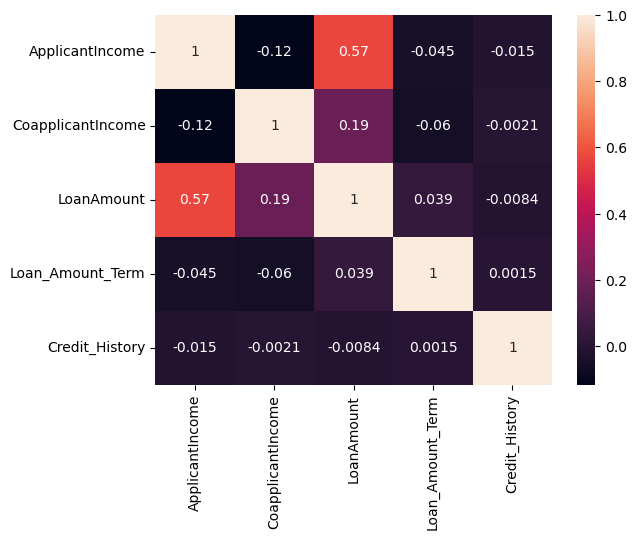

In [13]:
matrix = quantdf.corr()
print(matrix)

sns.heatmap(matrix, annot = True)  # Uses seaborn to print a heatmap

Looking at the correlation matrix above, we can see that LoanAmount and ApplicantIncome have a relatively strong correlation compared to the other covariants. So we may want to look at this is closer detail.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

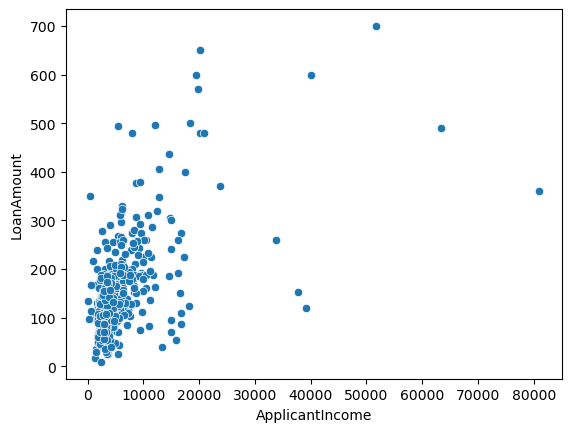

In [14]:
#we will now make a scatter plot of these two variables


sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount")

We can see a slight positive correlation as expected. Now it may be useful to see how these wo factors compared to whether the loan was accepted. (loan Status y/n)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

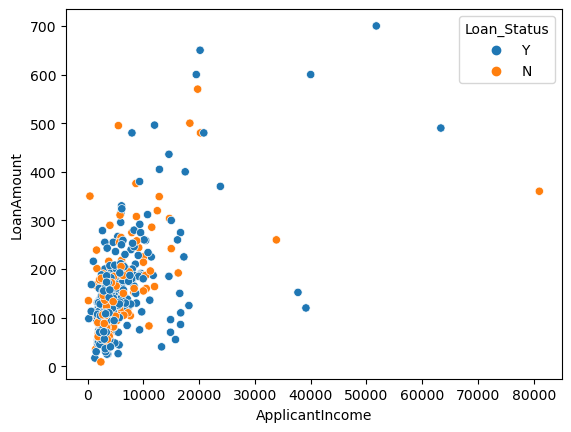

In [15]:
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status")

By adding colour to identify the satus of the loan, we can see how these two covariants don't have an immediately obvious correlation with whether a loan is accepted or not. 

We can use a pairplot to do the same for all quantative covariates.

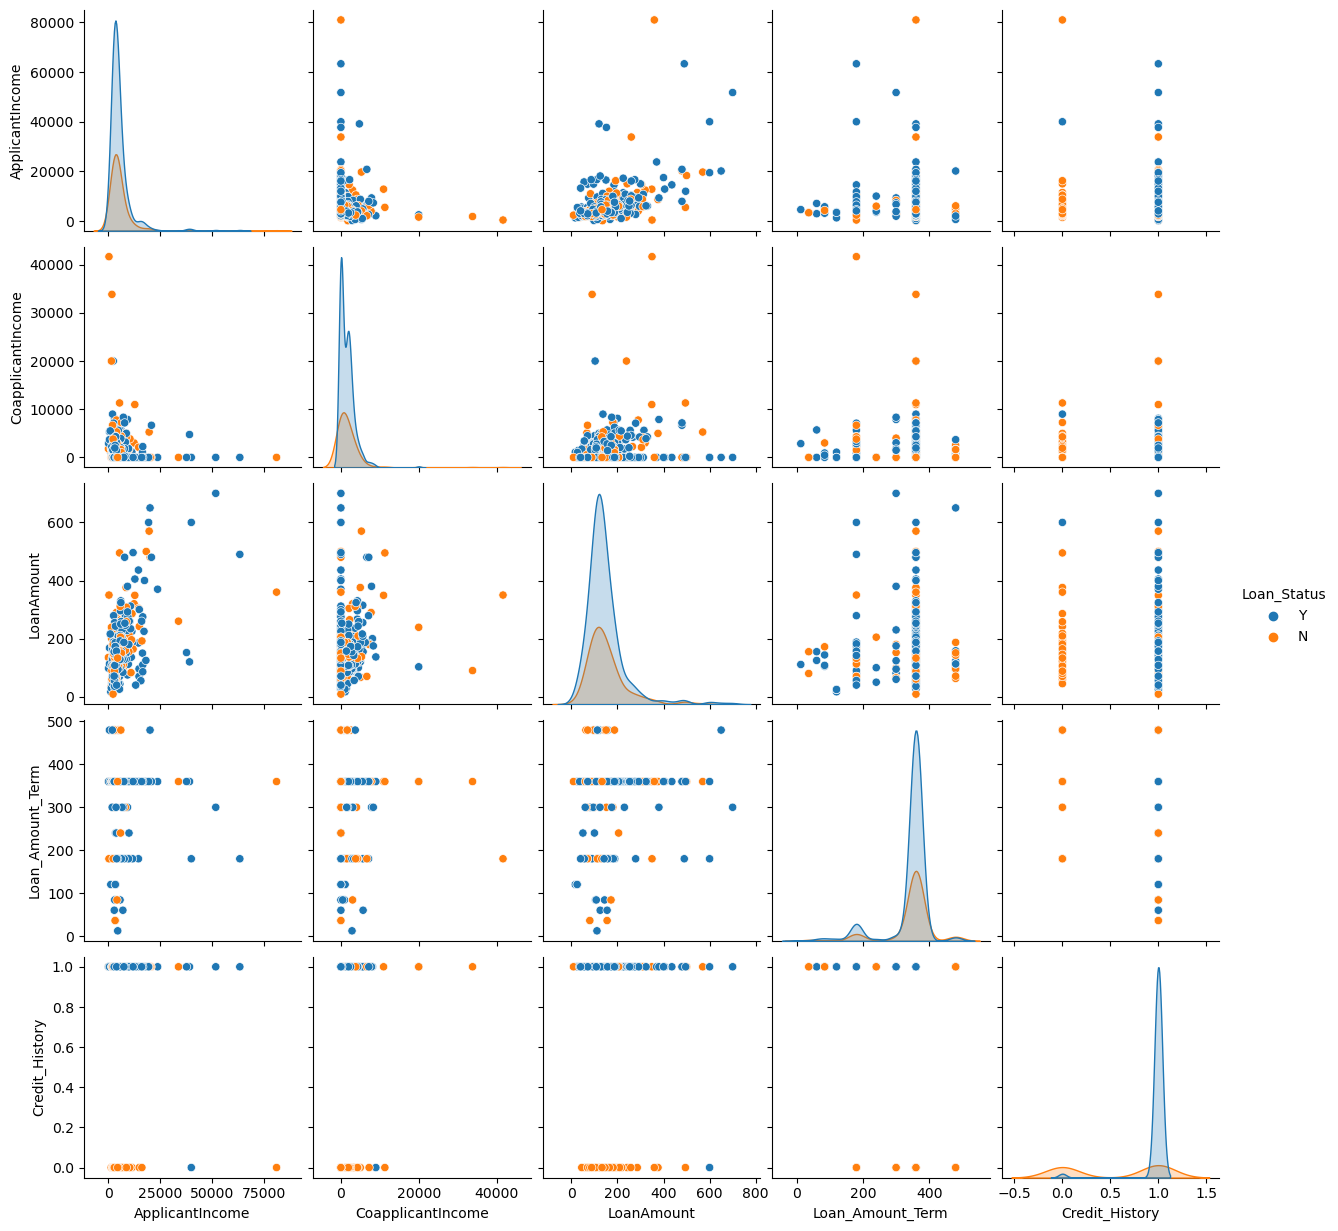

In [16]:
# Create pair plot
sns.pairplot(quantdf, hue = 'Loan_Status')
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

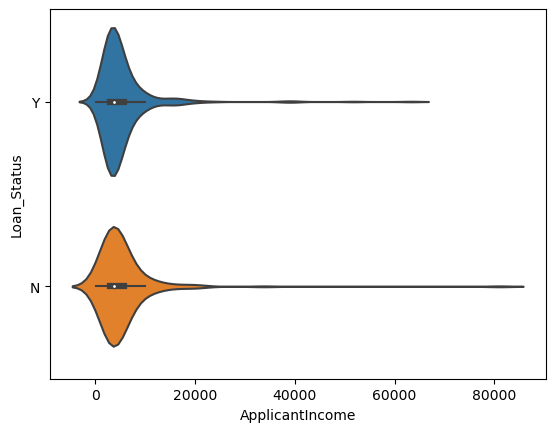

In [17]:
sns.violinplot(x=df.ApplicantIncome, y = df.Loan_Status)

## Qualitative data
We now want to start looking at the qualitative data as well. We use the seabron countplots first.


<AxesSubplot:xlabel='Gender', ylabel='count'>

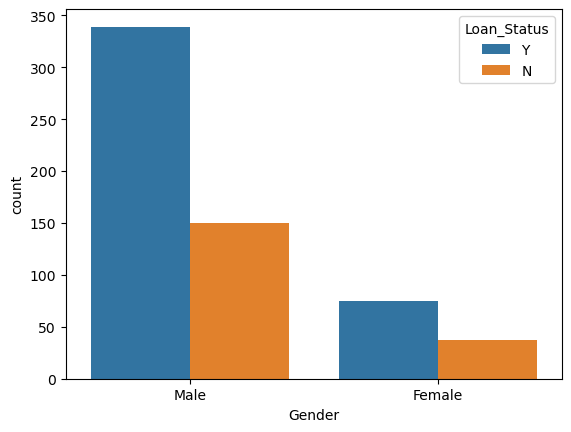

In [18]:
sns.countplot(x=df.Gender, hue=df.Loan_Status)

<AxesSubplot:xlabel='Married', ylabel='count'>

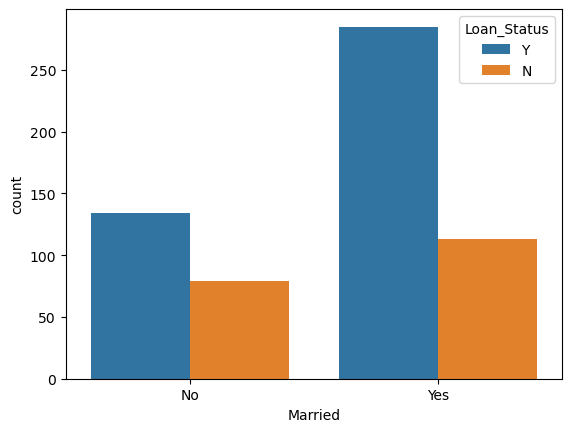

In [19]:
sns.countplot(x = df.Married, hue=df.Loan_Status)

<AxesSubplot:xlabel='Education', ylabel='count'>

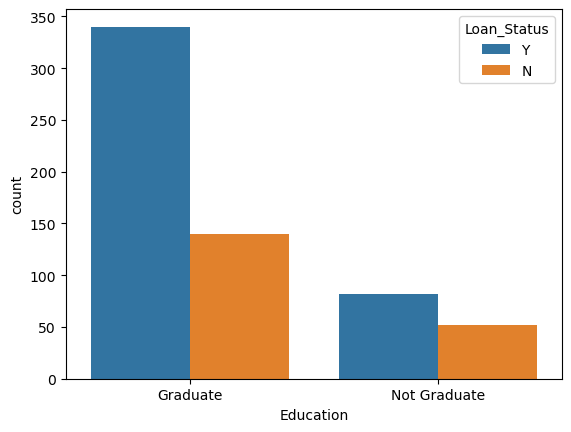

In [20]:
sns.countplot(x = df.Education, hue=df.Loan_Status)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

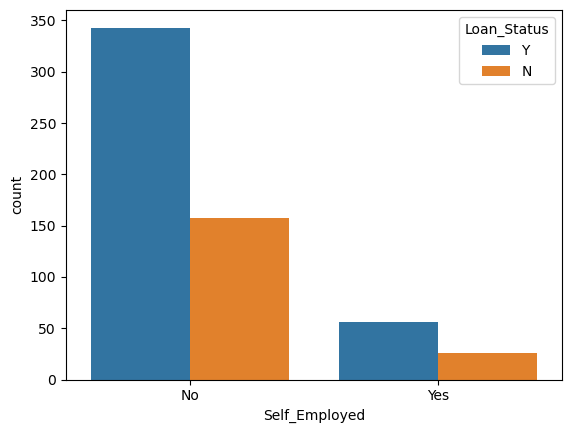

In [21]:
sns.countplot(x = df.Self_Employed, hue=df.Loan_Status)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

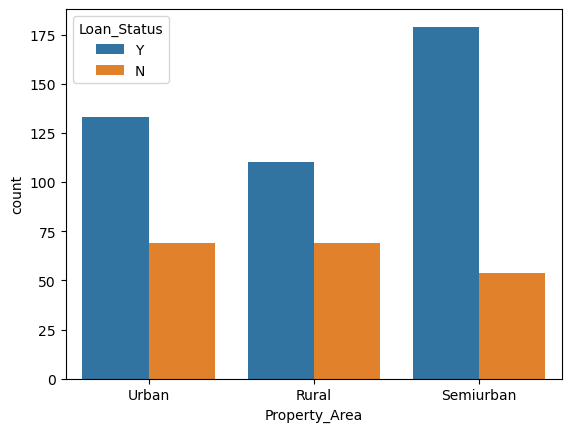

In [22]:
sns.countplot(x = df.Property_Area, hue=df.Loan_Status)

From the above bar plots we can see the distribuion of which data category each entry falls in, and also be able to compare the number of acceped loans against the number of loans that were not accepted for each category.